In [379]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_squared_error

In [380]:

# Importing data
train = pd.read_csv("C:/python/bigmart_train.csv")
test= pd.read_csv("C:/python/bigmart_test.csv")
print(train.shape)
train

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [381]:
train.columns
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [382]:
#combine test and train into one file
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [383]:
#describe information
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [384]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [385]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [386]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [387]:
data['Outlet_age']=2022-data['Outlet_Establishment_Year']
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [388]:
data['Outlet_Size'].unique

<bound method Series.unique of 0        Medium
1        Medium
2        Medium
3           NaN
4          High
          ...  
14199     Small
14200    Medium
14201       NaN
14202       NaN
14203       NaN
Name: Outlet_Size, Length: 14204, dtype: object>

In [389]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [390]:
data['Outlet_Size'].mode()[0]

'Medium'

In [391]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [392]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

<AxesSubplot:>

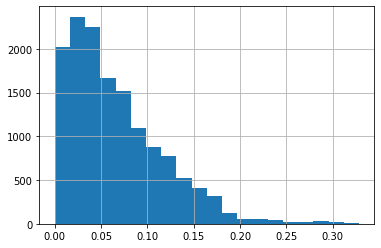

In [393]:
data['Item_Visibility'].hist(bins=20)

In [394]:
#now we have to detect outliers and remove outliers
q1=data['Item_Visibility'].quantile(0.25)
q2=data['Item_Visibility'].quantile(0.75)
iqr=q2-q1

In [395]:
filldata=data.query('(@q1-1.5*@iqr)<=Item_Visibility<=(@q2+1.5*@iqr)')

In [396]:
filldata.head(2)
filldata.shape

(13943, 14)

In [397]:
data.shape

(14204, 14)

In [398]:
data=filldata

In [399]:
data['Item_Visibility_bins']=pd.cut(data['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])

In [400]:
data['Item_Visibility_bins'].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [401]:
data['Item_Visibility_bins']=data['Item_Visibility_bins'].replace(np.nan,'Low Viz',regex=True)

In [402]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

In [403]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace('reg','Regular')

In [404]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [405]:
le=LabelEncoder()
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])
data['Item_Visibility_bins']=le.fit_transform(data['Item_Visibility_bins'])
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])

In [406]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [407]:
dummy=pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [408]:
data['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [409]:
data['Item_Identifier'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [410]:
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [411]:
data['Item_Type_Combined'].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [412]:
data.shape
data.isnull().value_counts

<bound method DataFrame.value_counts of        Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                False        False             False            False   
1                False        False             False            False   
2                False        False             False            False   
3                False        False             False            False   
4                False        False             False            False   
...                ...          ...               ...              ...   
14199            False        False             False            False   
14200            False        False             False            False   
14201            False        False             False            False   
14202            False        False             False            False   
14203            False        False             False            False   

       Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Yea

In [413]:
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [414]:
import warnings
warnings.filterwarnings('ignore')
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [415]:
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

In [416]:
train2=pd.read_csv('train_Modified.csv')
test2=pd.read_csv('test_Modified.csv')

In [417]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [418]:
X_train=train2.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'],axis=1)
Y_train=train2.Item_Outlet_Sales

In [419]:
X_test=test2.drop(['Outlet_Identifier','Item_Identifier'],axis=1)

In [420]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,23,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,15,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,24,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,15,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,37,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,25,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5564,7.600000,0.142991,169.1448,13,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5565,10.000000,0.073529,118.7440,20,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5566,15.300000,0.000000,214.6218,15,3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [421]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X_train,Y_train,test_size=0.3,random_state=42)

In [422]:
lin=LinearRegression()
lin.fit(xtrain,ytrain)

LinearRegression()

In [423]:
print(lin.coef_)
lin.intercept_

[-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -3.19310190e+01
 -4.64698319e+00 -1.55426303e+00  1.55426303e+00  1.88969149e+02
  4.83874237e+01 -2.37356573e+02  5.39972452e+02 -3.11545503e+02
 -2.28426949e+02 -1.63452944e+03 -1.26820412e+02 -3.48655405e+02
  2.11000526e+03  9.06454503e+00  3.46403369e+01 -4.37048820e+01]


1074.1452929565105

In [424]:
predictions=lin.predict(xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [425]:
import math
print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.2352692434754


In [426]:
y_sales_predict=lin.predict(X_test)
y_sales_predict

array([1788.81075495, 1593.90875193, 1845.79649796, ..., 1831.65421972,
       3605.8573969 , 1284.78769015])

In [427]:
test_predictions=pd.DataFrame({'Item_Identifier':test2['Item_Identifier'],'Outlet_Identifier':test2['Outlet_Identifier'],'Item_Outlet_Sales':y_sales_predict},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [428]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.810755
1,FDW14,OUT017,1593.908752
2,NCN55,OUT010,1845.796498
3,FDQ58,OUT017,2675.927968
4,FDY38,OUT027,5134.091429
...,...,...,...
5563,FDB58,OUT046,2360.100059
5564,FDD47,OUT018,2419.143609
5565,NCO17,OUT045,1831.654220
5566,FDJ26,OUT017,3605.857397
